<a href="https://colab.research.google.com/github/mirzarayhan/PCVK_Genap_2021/blob/main/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

In [25]:
#kernel image 

sharpen = np.array([[0,-1,0],
                    [-1,5,-1],
                    [0,-1,0]])

emboss = np.array([[-2,-1,0],
                    [-1,1,1],
                    [0,1,2]])

canny = np.array([[-1,-1,-1],
                  [-1,8,-1],
                  [-1,-1,-1]])

sobel = np.array([[1,0,-1],
                  [2,0,-2],
                  [1,0,-1]])

box_blur = (1/9.0)*np.array([[1,1,1],
                             [1,1,1],
                             [1,1,1]])

gaussian3 = (1/16.0)*np.array([[1,2,1],
                             [2,4,2],
                             [1,2,1]])

gaussian5 = (1/256.0)*np.array([[1,4,6,4,1],
                               [4,16,24,16,4],
                               [6,24,36,24,6],
                               [4,16,24,16,4],
                               [1,4,6,4,1]])

# gaussian21
kernel_size=21
sigma=math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

average = (1/9.0)*np.array([[1,1,1],
                            [1,1,1],
                            [1,1,1]])

low = (1/12.0)*np.array([[1,1,1],
                        [1,4,1],
                        [1,1,1]])

high = np.array([[-1,0,1],
                [-1,0,3],
                [-3,0,1]])

kernels = [sharpen,emboss,canny,sobel, box_blur, gaussian3, gaussian5, gauss_kernel,average,
          low, high]

nama_kernel = ['Sharpen', 'Emboss', ' Canny Edge Detection', 'Left Sobel Edge Detection',
               'Box Blur', '3x3 Gaussian Blur', '5x5 Gaussian Blur', '21x21 Gaussian Blur',
               'Average Pass Filter','Low Pass Filter','High Pass Filter']

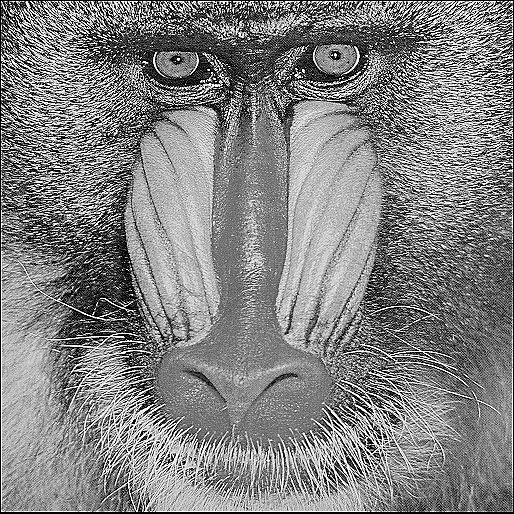

In [28]:
# function convolution2d
def convolution2d(image, kernel, stride, padding):
  image = np.pad(image,padding, mode='constant',constant_values=0)

  kernel_height, kernel_width = kernel.shape 
  padded_height, padded_width = image.shape

  output_height =(padded_height-kernel_height)//stride+1
  output_width =(padded_width-kernel_width)//stride+1

  new_image = np.zeros((output_height, output_width)).astype(np.float32)

  for y in range(0, output_height):
    for x in range(0, output_width):
      new_image[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride+kernel_width]*kernel).astype(np.float32)
  return new_image

# sharpen
img = cv.imread('/content/drive/MyDrive/Images/mandrill.tiff')
img_color = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

cv2_imshow(convolution2d(img_color, sharpen,1,2))

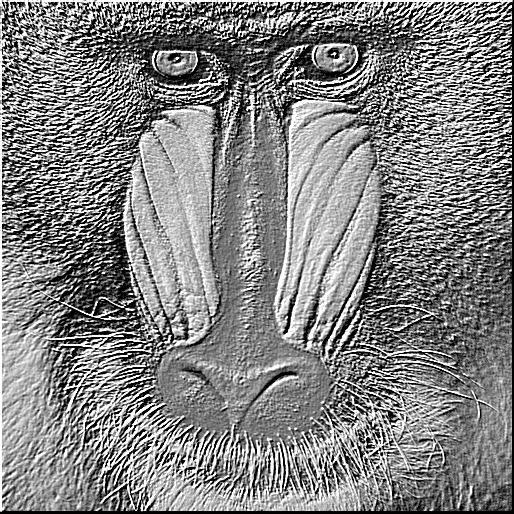

In [29]:
# emboss
img = cv.imread('/content/drive/MyDrive/Images/mandrill.tiff')
img_color = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

cv2_imshow(convolution2d(img_color, emboss,1,2))

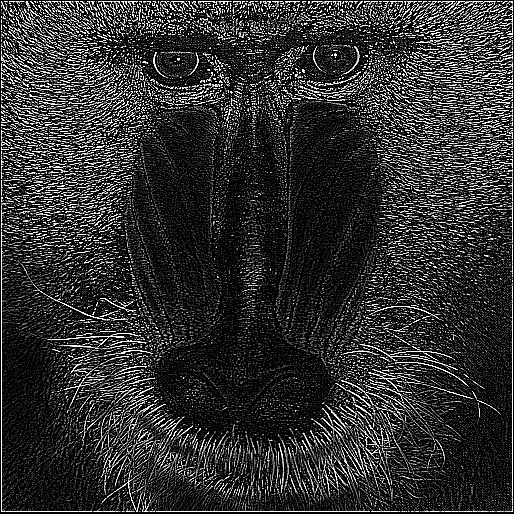

In [30]:
#canny
img = cv.imread('/content/drive/MyDrive/Images/mandrill.tiff')
img_color = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

cv2_imshow(convolution2d(img_color, canny,1,2))

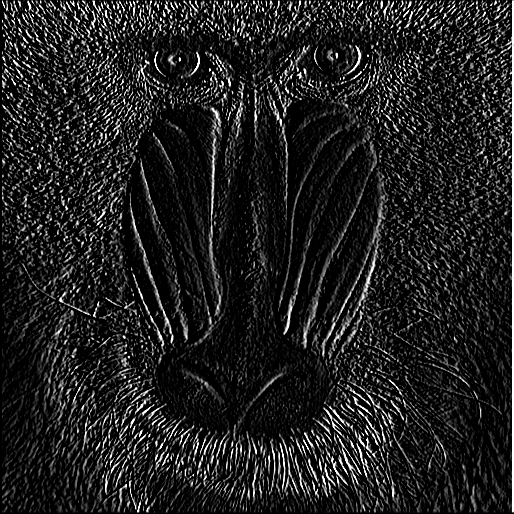

In [31]:
# sobel
img = cv.imread('/content/drive/MyDrive/Images/mandrill.tiff')
img_color = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

cv2_imshow(convolution2d(img_color, sobel,1,2))

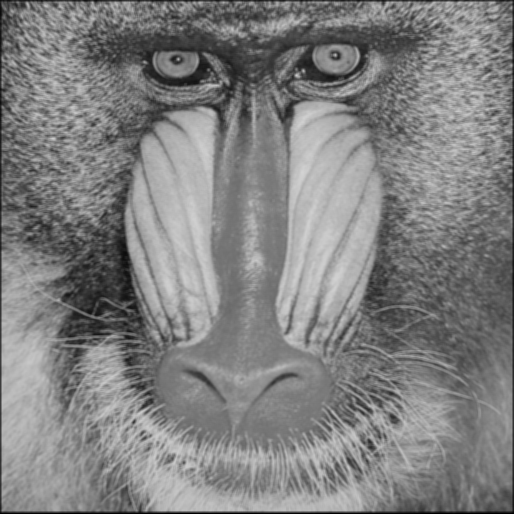

In [32]:
# box blur
img = cv.imread('/content/drive/MyDrive/Images/mandrill.tiff')
img_color = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

cv2_imshow(convolution2d(img_color, box_blur,1,2))

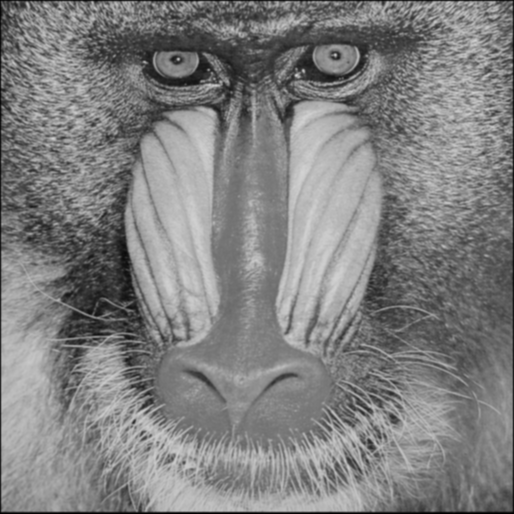

In [33]:
# gaussian 3x3
img = cv.imread('/content/drive/MyDrive/Images/mandrill.tiff')
img_color = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

cv2_imshow(convolution2d(img_color, gaussian3,1,2))

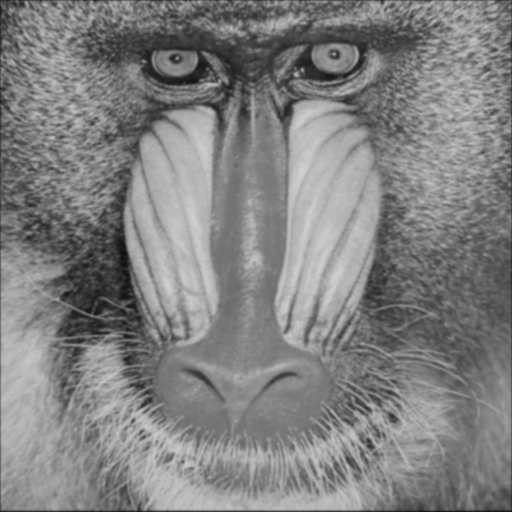

In [34]:
# gaussian 5x5
img = cv.imread('/content/drive/MyDrive/Images/mandrill.tiff')
img_color = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

cv2_imshow(convolution2d(img_color, gaussian5,1,2))

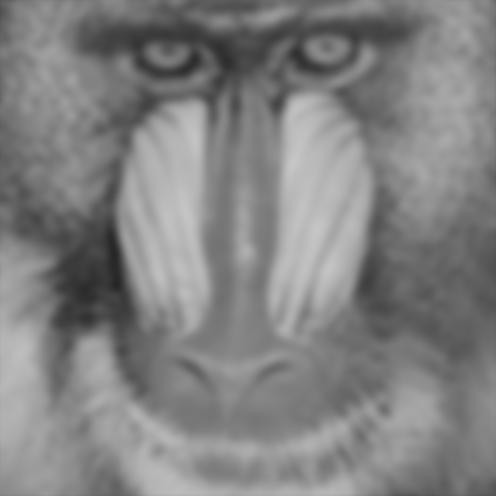

In [35]:
# gaussian 21x21
img = cv.imread('/content/drive/MyDrive/Images/mandrill.tiff')
img_color = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

cv2_imshow(convolution2d(img_color, gauss_kernel,1,2))

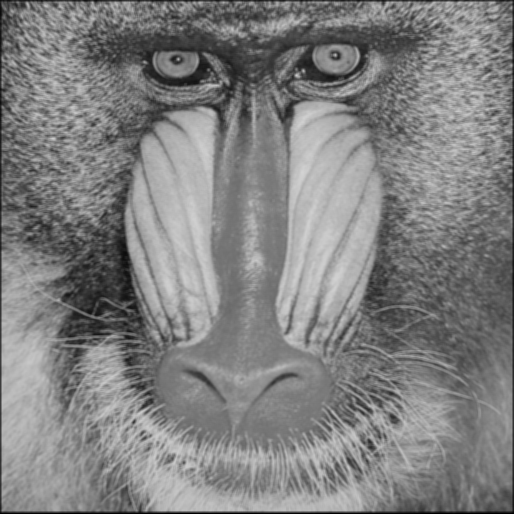

In [36]:
# average pass filter
img = cv.imread('/content/drive/MyDrive/Images/mandrill.tiff')
img_color = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

cv2_imshow(convolution2d(img_color, average,1,2))

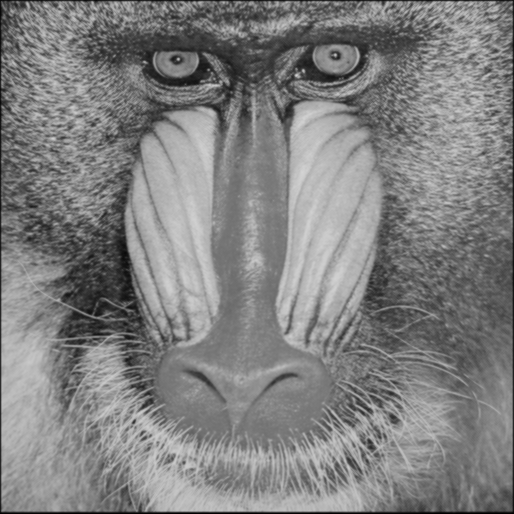

In [37]:
# low pass filter
img = cv.imread('/content/drive/MyDrive/Images/mandrill.tiff')
img_color = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

cv2_imshow(convolution2d(img_color, low,1,2))

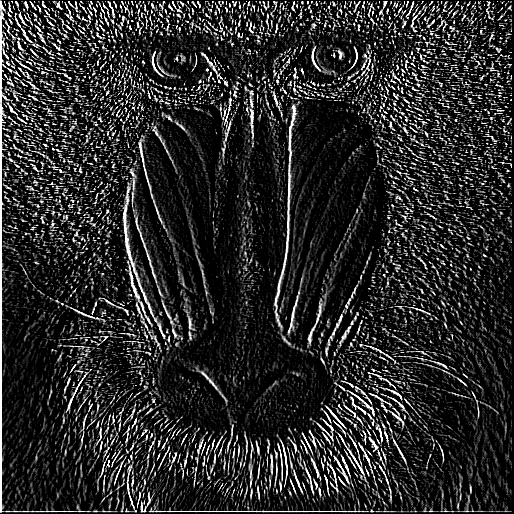

In [38]:
# high pass filter
img = cv.imread('/content/drive/MyDrive/Images/mandrill.tiff')
img_color = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

cv2_imshow(convolution2d(img_color, high,1,2))

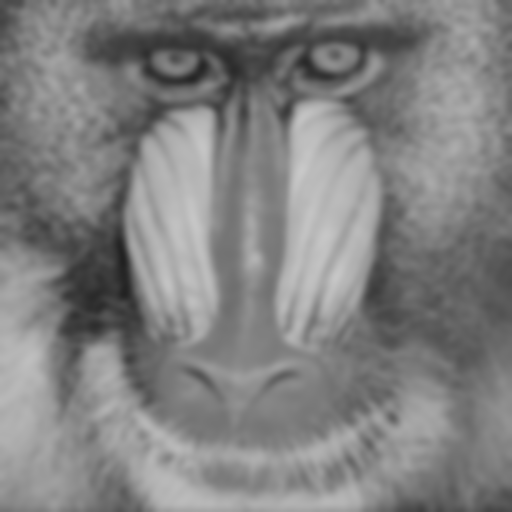

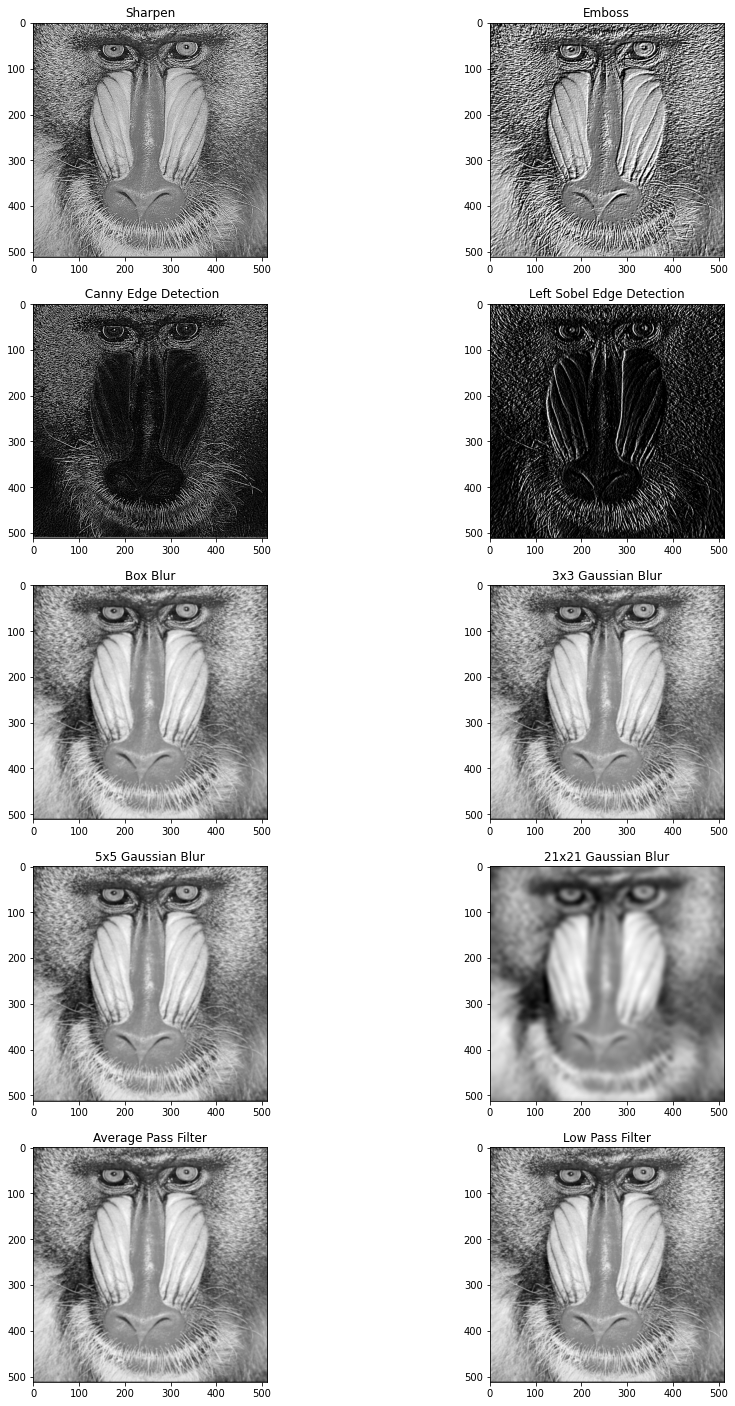

In [39]:
#Menggunakan library
img = cv.imread('/content/drive/MyDrive/Images/mandrill.tiff')
img_color = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

figure, axis = plt.subplots(5,2, figsize=(15,25))

for kernel, name, ax in zip(kernels, nama_kernel, axis.flatten()):
  conv_image=im.fromarray(cv.filter2D(img_color, -1, kernel[::-1, ::-1]))
  ax.imshow(conv_image,cmap='gray')
  ax.set_title(name)

# gaussian blur pada cv
blur = cv.GaussianBlur(img_color,(21,21),0)
cv2_imshow(blur)